In [1]:
# import dataset

import pandas as pd
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
data = pd.read_csv(url, header=None)

In [2]:
# printing data shape

data.shape

(306, 4)

                0           1           2           3
count  306.000000  306.000000  306.000000  306.000000
mean    52.457516   62.852941    4.026144    1.264706
std     10.803452    3.249405    7.189654    0.441899
min     30.000000   58.000000    0.000000    1.000000
25%     44.000000   60.000000    0.000000    1.000000
50%     52.000000   63.000000    1.000000    1.000000
75%     60.750000   65.750000    4.000000    2.000000
max     83.000000   69.000000   52.000000    2.000000


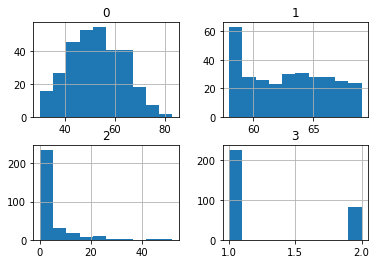

In [3]:
# understanding the data

from matplotlib import pyplot as plt
print(data.describe())
data.hist()
plt.show()

In [4]:
# data preprocessing

from sklearn.preprocessing import LabelEncoder
X = data[[0,1,2]]
y = data[3]
X = X.astype('float64')
y = y.astype('float64')
y = LabelEncoder().fit_transform(y)

In [5]:
# train test split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [12]:
# building the model

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Normalization

model = Sequential()
model.add(Dense(12, input_shape=(3,), activation="relu", kernel_initializer='he_normal'))
model.add(Dropout(0.2))
model.add(Dense(2, activation="softmax"))
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 12)                48        
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 26        
                                                                 
Total params: 74
Trainable params: 74
Non-trainable params: 0
_________________________________________________________________


In [13]:
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/25
7/7 [==============================] - 0s 25ms/step - loss: 74.4599 - accuracy: 0.5935 - val_loss: 1.0986 - val_accuracy: 0.5543
Epoch 2/25
7/7 [==============================] - 0s 6ms/step - loss: 6.2813 - accuracy: 0.6028 - val_loss: 0.5979 - val_accuracy: 0.7500
Epoch 3/25
7/7 [==============================] - 0s 6ms/step - loss: 0.6859 - accuracy: 0.6822 - val_loss: 0.9065 - val_accuracy: 0.5435
Epoch 4/25
7/7 [==============================] - 0s 6ms/step - loss: 0.6980 - accuracy: 0.6589 - val_loss: 0.5021 - val_accuracy: 0.7935
Epoch 5/25
7/7 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.7009 - val_loss: 0.5076 - val_accuracy: 0.7826
Epoch 6/25
7/7 [==============================] - 0s 6ms/step - loss: 0.6400 - accuracy: 0.7009 - val_loss: 0.6040 - val_accuracy: 0.7174
Epoch 7/25
7/7 [==============================] - 0s 7ms/step - loss: 0.5851 - accuracy: 0.7056 - val_loss: 0.5186 - val_accuracy: 0.8043
Epoch 8/25
7/7 [================

In [14]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

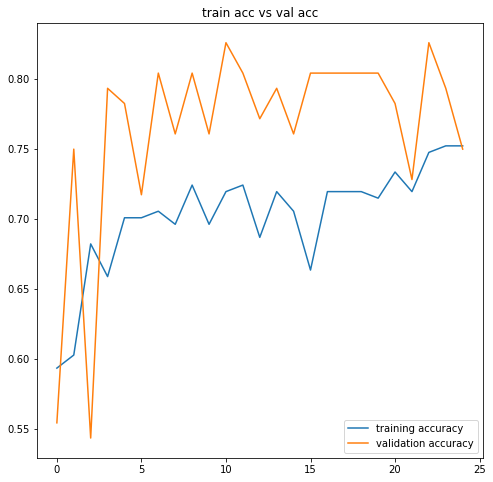

In [15]:
# visualizing the training

from matplotlib import pyplot as plt

plt.figure(figsize=(8,8))
epochs = range(25)
plt.plot(epochs, accuracy, label='training accuracy')
plt.plot(epochs, val_accuracy, label='validation accuracy')
plt.legend(loc='lower right')
plt.title('train acc vs val acc')
plt.show()

In [10]:
print(len(y[y==0]))
print(len(y[y==1]))

225
81


In [11]:
221 / (221 + 81)

0.7317880794701986